#### Задача 8.1. Найти приближенное решение краевой задачи  с точностью 0.001 ####

$ 
\begin{cases} -(k(x)u')' + q(x)u = f(x), & \mbox{x} \in {(a,b)} \\  \qquad u(a) = Ua,  \qquad u(b) = Ub \end{cases}
$

#### 1. Cоставить разностную схему второго порядка точности и выписать коэффициенты  матрицы системы уравнений и коэффициенты правой части. ####

In [19]:
import numpy as np
import copy
from matplotlib import pyplot as plt 
import math as m

\begin{equation}
A = 
\begin{pmatrix}
1 & 0 & 0 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & a_{i,i-1} & a_{i,i} & a_{i,i+1} & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 1
\end{pmatrix}, \quad
f^{h} = 
\begin{pmatrix}
ua \\
h^{2}f_{1} \\
\vdots \\
h^{2}f_{N-1} \\
ub
\end{pmatrix}, \quad
Au = f
\end{equation}

#### \begin{equation} 
a_{i,i-1} = -k_{i-\frac{1}{2}}, \quad 
a_{i,i} = k_{i-\frac{1}{2}} + k_{i + \frac{1}{2}} + h^{2}q_{i}, \quad 
a_{i, i+1} = -k_{i+\frac{1}{2}} 
\end{equation}

#### 2.Подготовить тестовый пример для исходной задачи. В качестве входных данных для построения тестового примера взять функции: u(x) – решение краевой задачи, [a,b], q(x),  k(x) = k1(x) ####

#### $ u'(x) = [\dfrac{3x}{1+x}]' = \dfrac{3}{(1+x)^2} \qquad k(x) = 1 + x \qquad q(x) = 2 + 2x $ ####
#### $ -(k(x)u')' + q(x)u = \dfrac{3}{(x+1)^2} + 6x = f(x) $ ####
### Тестовый пример ###
### $ \begin{cases} [-(1+x)u']' + (2+2x)u = \dfrac{3}{(x+1)^2} + 6x  \\
u(1) = 3/2 \qquad u(3) = 9/4 
\end{cases}
$ 

In [42]:
# Определяем границы отрезка и точность
left_boundary_condition = 3/2
right_boundary_condition = 9/4
left_boundary_value_of_segment = 1
right_boundary_value_of_segment = 3
eps = 0.001
def q(x) :
    return 2 + 2 * x

def u(x):
    return 3 * x / (1 + x)

def k(x):
    return 1 + x

### Разностная  схема ###

In [45]:
def difference_scheme(size, left_boundary_value_of_segment, right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition, k, q, f = None):
    
    if f == None:
        def f(x):
            return 3/(x+1)**2 + 6*x
    h = (right_boundary_value_of_segment - left_boundary_value_of_segment) / (size)
    
    # Создаем матрицу нулей и вектор правой части
    matrix = np.zeros(size * size)
    matrix.shape = (size, size)
    res = np.array([0.0 for i in range(size)])
    
    # Устанавливаем граничные условия
    res[0] = left_boundary_condition
    res[size - 1] = right_boundary_condition
    matrix[0][0] = 1
    matrix[size-1][size-1] = 1

    # Заполняем матрицу коэффициентов и вектор правой части для внутренних узлов
    for i in range(1, size - 1):
        x_i = left_boundary_value_of_segment + h * i
        matrix[i][i-1] = - k(x_i - h/2)
        matrix[i][i+1] = - k(x_i + h/2)
        matrix[i][i] = -matrix[i][i-1]  -matrix[i][i+1] + h ** 2 * q(x_i)
        res[i] = h**2 * f(x_i)
        
    return matrix, res
    

### Метод прогонки ###

In [48]:
def thomas_algorithm(matrix, result):

    length = len(result)

    # Создаем массивы для наддиагональных, диагональных и поддиагональных элементов
    above_diagonal = [0] + [matrix[i][i-1] for i in range(1, length)]
    diagonal = [matrix[i][i] for i in range(length)]
    under_diagonal = [matrix[i][i+1] for i in range(length-1)] + [0]

    # Прямой ход алгоритма
    for i in range(1, length):
        factor = above_diagonal[i] / diagonal[i-1]      # Вычисляем множитель
        diagonal[i] -= factor * under_diagonal[i-1]     # Обновляем диагональный элемент
        result[i] -= factor * result[i-1]               # Обновляем вектор правой части
    
    res = np.zeros(length)
    res[-1] = result[-1] / diagonal[-1]

    # Обратный ход алгоритма
    for i in range(length-2, -1, -1):
        res[i] = (result[i] - under_diagonal[i] * res[i+1]) / diagonal[i]
    
    return res

### 3.Составить программу, реализующую решение системы уравнений  и провести расчет для тестового примера c точностью 0.001. Для решения СЛАУ использовать метод прогонки. ###

In [51]:
def find_res(left_boundary_value_of_segment,  right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition ,difference_scheme, k, q, f = None):
    size = 2
    
    # Получаем матрицу и вектор правой части для начального размера сетки, затем находим решение
    matrix1, res1 = difference_scheme(1, left_boundary_value_of_segment, right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition, k, q, f)
    res3 = thomas_algorithm(matrix1, res1)

    # Аналогично для следующего размера сетки
    matrix2, res2 = difference_scheme(2, left_boundary_value_of_segment, right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition, k, q, f)
    res4 = thomas_algorithm(matrix2, res2)
    
    #Увеличиваем размер сетки
    while True:
        matrix1, res1 = copy.deepcopy(matrix2), copy.copy(res2)
        res3 = copy.copy(res4)
        # Увеличиваем размер сетки и получаем новую матрицу и вектор правой части, находим решение для нового размера сетки
        matrix2, res2 = difference_scheme(size * 2, left_boundary_value_of_segment, right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition, k, q, f)
        res4 = thomas_algorithm(matrix2, res2)
        size *= 2
        # Проверка на сходимость: сравниваем решение с предыдущим для выхода из цикла
        if max(np.abs(res4[::2] - res3)) < eps:
            break
    return res4, size


### 4. Построить графики приближенного и точного решений  и график погрешностей для тестового примера.  ###

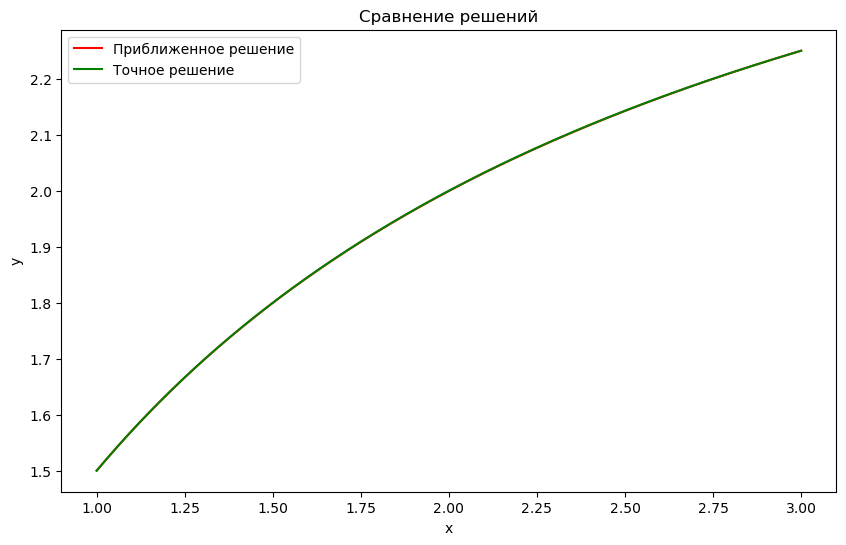

Заданная точность достигается при h = 0.00390625


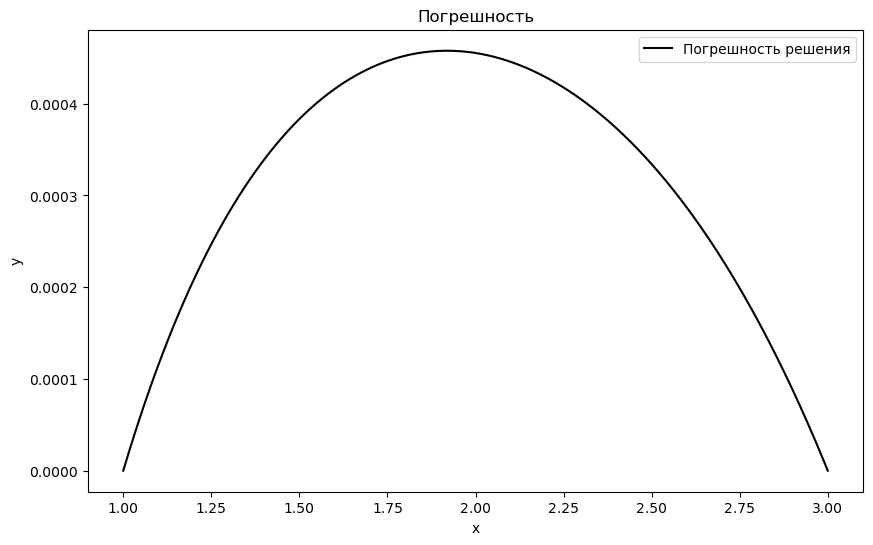

In [54]:
values_func = find_res(left_boundary_value_of_segment,  right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition ,difference_scheme, k, q)
a = np.linspace(left_boundary_value_of_segment, right_boundary_value_of_segment, values_func[1])
plt.figure(figsize=(10, 6))

plt.plot(a, values_func[0], color='red', label='Приближенное решение')

plt.plot(a, u(a), color='green', label='Точное решение')


plt.title("Сравнение решений")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


plt.show()
plt.figure(figsize=(10, 6))
print(f"Заданная точность достигается при h = {(right_boundary_value_of_segment - left_boundary_value_of_segment) / (values_func[1])}")
plt.plot(a, np.abs(u(a) - values_func[0]), color='black', label='Погрешность решения')
plt.title("Погрешность")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### После проверки правильности работы программы перейти к решению основной задачи. Недостающие данные взять из таблицы 8.1, а именно Ua Ub и f(x) Построить график найденного решения и указать шаг, при котором заданная точность достигается.

Заданная точность достигается при h = 0.00390625


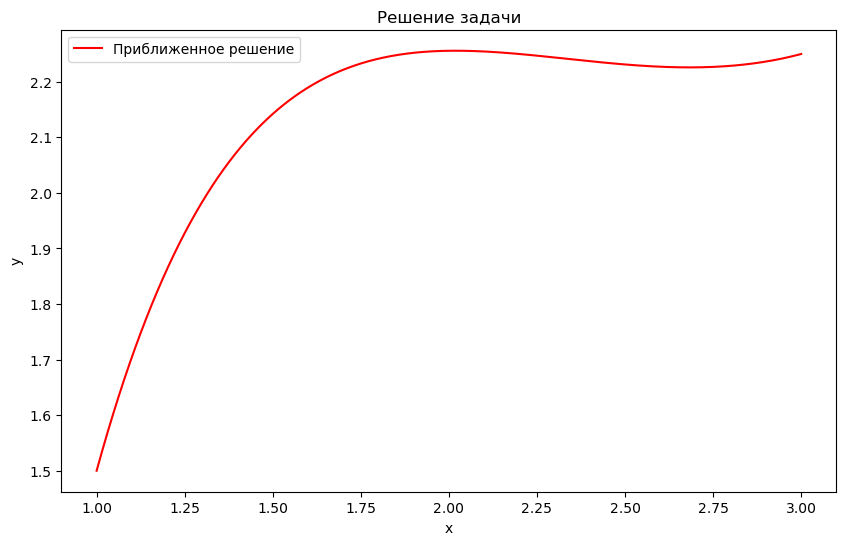

In [57]:
def f(x):
    return 15
values_func = find_res(left_boundary_value_of_segment,  right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition ,difference_scheme, k, q, f)
a = np.linspace(left_boundary_value_of_segment, right_boundary_value_of_segment, values_func[1])
plt.figure(figsize=(10, 6))


plt.plot(a, values_func[0], color='red', label='Приближенное решение')

plt.title("Решение задачи")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

print(f"Заданная точность достигается при h = {(right_boundary_value_of_segment - left_boundary_value_of_segment) / (values_func[1])}")


### Задача 8.2. Стержень составляется из трех частей одинаковой длины 1 и с разными коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка x0 стержня имела максимальную температуру? ###


### У стержня может быть 6(3!) конфигураций: ###
#### k1k2k3 k1k3k2 k2k1k3 k2k3k1 k3k1k2 k3k2k1 ####


### Модификация кода ###

In [64]:
# При каждой конфигурации стержня
def k1(x):
    return 1 + x 
def k2(x):
    return np.log(7-x)
def k3(x):
    return 19
def f(x):
    return 15
    
part1=1
part2=2
left_boundary_value_of_segment = 0
right_boundary_value_of_segment = 3
left_boundary_condition = 6
right_boundary_condition = 2
size = 300

#Функция для построения разностной схемы
def difference_scheme(size, left_boundary_value_of_segment, right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition, k1, k2, k3, part1, part2, q, f = None):
    
    if f == None:
        def f(x):
            return 3/(x+1)**2 + 6*x
    h = (right_boundary_value_of_segment - left_boundary_value_of_segment) / (size)
    
    matrix = np.zeros(size * size)
    matrix.shape = (size, size)
    res = np.array([0.0 for i in range(size)])
    
    res[0] = left_boundary_condition
    res[size - 1] = right_boundary_condition
    matrix[0][0] = 1
    matrix[size-1][size-1] = 1
    
    for i in range(1, size - 1):
        x_i = left_boundary_value_of_segment + h * i
        if x_i < part1:
            k = k1
        elif x_i < part2:
            k = k2
        else:
            k = k3
        matrix[i][i-1] = - k(x_i - h/2)
        matrix[i][i+1] = - k(x_i + h/2)
        matrix[i][i] = -matrix[i][i-1]  -matrix[i][i+1] + h ** 2 * q(x_i)
        res[i] = h**2 * f(x_i)
    return matrix, res
    
#Функция для получения значений при каждой конфигурации стержня в зависимости от индекса
def get_conductivity(i, arr):
    if i == 1:
        return [arr[0],arr[1],arr[2]]
    if i == 2:
        return [arr[0],arr[2],arr[1]]
    if i == 3:
        return [arr[1],arr[0],arr[2]]
    if i == 4:
        return [arr[1],arr[2],arr[0]]
    if i == 5:
        return [arr[2],arr[1],arr[0]]
    if i == 6:
        return [arr[2],arr[0],arr[1]]

## 3. Построить на одном чертеже графики приближенного решения для каждой конфигурации стержня. ##

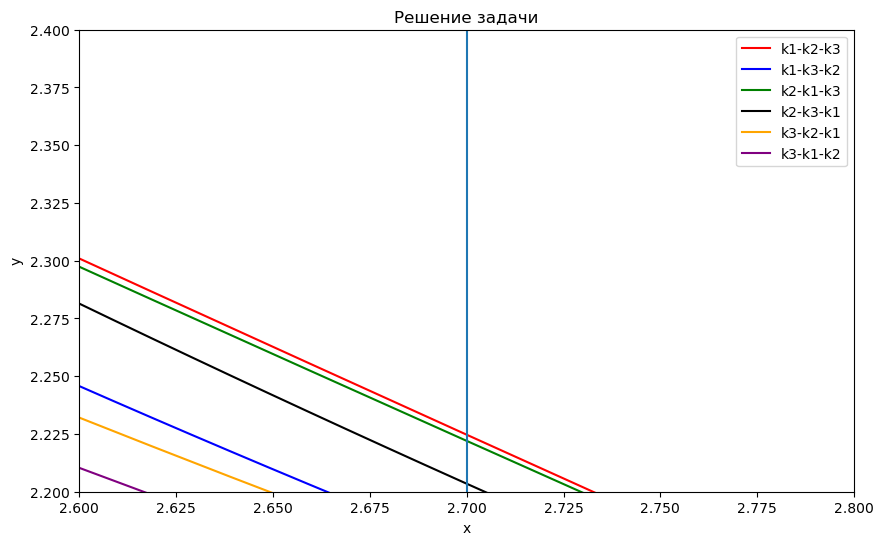

In [67]:
colors = ['red', 'blue', 'green', 'black', 'orange', 'purple']
labels = ['k1-k2-k3', 'k1-k3-k2', 'k2-k1-k3', 'k2-k3-k1', 'k3-k2-k1', 'k3-k1-k2']
plt.figure(figsize=(10, 6))
for i in range(1,7):
    plt.plot(np.linspace(0,3,300), thomas_algorithm(*difference_scheme(size, left_boundary_value_of_segment, right_boundary_value_of_segment, left_boundary_condition, right_boundary_condition, *get_conductivity(i, [k1,k2,k3]), part1, part2, q, f)),color=colors[i-1], label=labels[i-1])
plt.axvline(2.7)
plt.xlim(2.6, 2.8)
plt.ylim(2.2,2.4)
plt.title("Решение задачи")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
 

### Самая большая температура в $ x = 2.7 $  при конфигурации ###
$ 
\begin{cases} k = 1 + x \qquad x \in [0,1] \\  k = ln(7-x) \qquad x \in [1,2] \\   k = 19 \qquad x \in [2,3] \end{cases}
$

## 8.3 Решить краевую задачу  методом баланса с точностью 0.001. ##
### Уравнение имеет вид: $ [-(k(x) u')' + q(x) u = f(x)]$ ###


Введите шаг для сетки: 


 0.5


Найденное значение h:  0.001953125


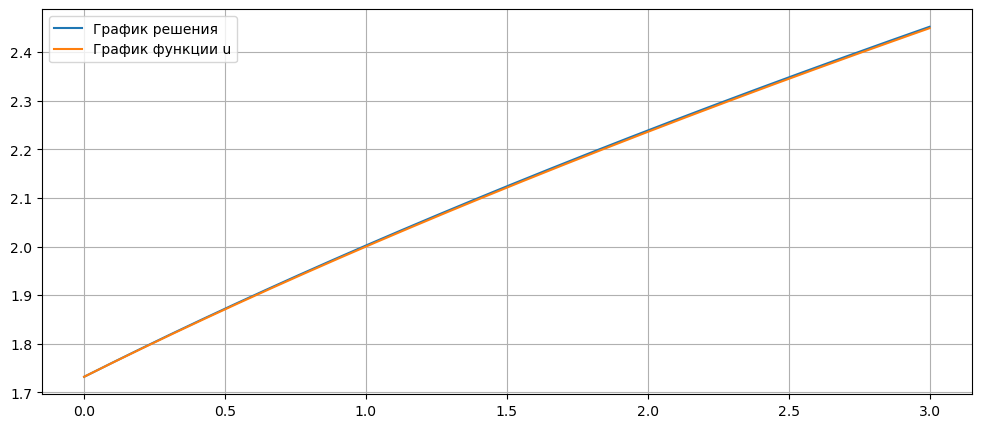

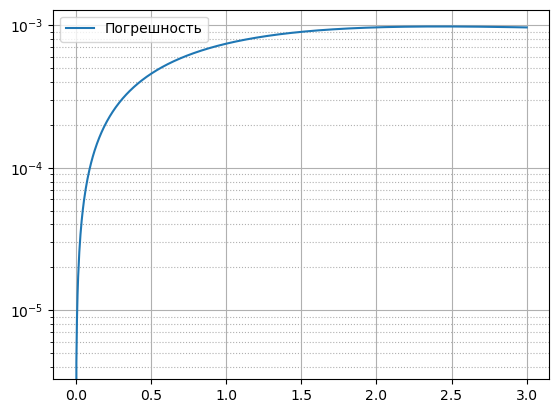

In [91]:
a = 0  
b = 3  

u_1 = m.sqrt(3)  
u_2 = (6.5/m.sqrt(6) + 0.5*m.sqrt(6))  

# Определение функции для вычисления интеграла k с учетом отрицательного шага
def k_int_minus(k, x, h):
    return ((1/k(x) + 1/k(x - h))/2)**(-1)  

# Определение функции для вычисления интеграла k с учетом положительного шага
def k_int_plus(k, x, h):
    return ((1/k(x + h) + 1/k(x))/2)**(-1)  

# Определение функции для вычисления интеграла q в точке (x - h)
def q_int(q, x, h):
    return q(x-h) 

# Определение функции для вычисления интеграла f в точке (x - h)
def f_int(f, x, h):
    return f(x-h)  

def A(k,x,h):
    return -k_int_minus(k, x, h)/h**2 

def B(k,q,x,h):
    return (k_int_plus(k, x, h) + k_int_minus(k, x, h))/h**2 + q_int(q, x, h) 

def C(k,x,h):
    return -k_int_plus(k, x, h)/h**2  

print("Введите шаг для сетки: ")
h = float(input()) 

# Определение количества узлов N, создание матрицы для системы уравнений и вектора правой части
N = int((b - a)/h) 
mat = np.zeros([N+1, N+1]) 
D = np.zeros(N+1)  
# Установка граничных условий
mat[0][0] = 1 
mat[N][N-1] = -13/h 
mat[N][N] = (13 + 0.5*h)/h 

# Установка значений вектора D
D[0] = u_1 
D[N] = u_2  

# Заполнение матрицы для внутренних узлов
for i in range(N-1):
    mat[i+1][i] = A(k, a + h*i, h)  
    mat[i+1][i+1] = B(k, q, a + h*i, h)  
    mat[i+1][i+2] = C(k, a + h*i, h)  

# Заполнение вектора D для внутренних узлов
for i in range(1, N):
    D[i] = f(a + h*i)  

t = np.arange(a, b+h, h)  

# Начало метода прогонки для решения системы уравнений
alpha = np.zeros(N)  
beta = np.zeros(N+1) 

# Начальные знвчения
alpha[0] = 0 
beta[0] = D[0]/mat[0][0] 


# Вычисление коэффициентов
for i in range(1, N):
    alpha[i] = -mat[i][i+1]/(mat[i][i] + mat[i][i-1]*alpha[i-1])
for i in range(1,N+1):
    beta[i] = (D[i] - mat[i][i-1]*beta[i-1])/(mat[i][i] + mat[i][i-1]*alpha[i-1])
    
# Решение системы уравнений
y = np.zeros(N+1)  
y[N] = beta[N]  

# Обратная прогонка для вычисления значений y
for i in range(N-1, -1, -1):
    y[i] = alpha[i]*y[i+1] + beta[i]  

# Сохранение значений для проверки сходимости
y_prev = y  
t_prev = t
N_prev = N
h = h/2  

flag = True  
# Цикл для проверки сходимости
while(flag):
    flag = True 
    # Пересчет количества узлов N и создание новой матрицы и вектора
    N = int((b - a)/h) 
    mat = np.zeros([N+1, N+1])  
    D = np.zeros(N+1) 

    # Установка граничных условий
    mat[0][0] = 1 
    mat[N][N-1] = -13/h  
    mat[N][N] = (13 + 0.5*h)/h

    D[0] = u_1  
    D[N] = u_2  
    
    # Заполнение матрицы для внутренних узлов
    for i in range(N-1):
        mat[i+1][i] = A(k, a + h*i, h) 
        mat[i+1][i+1] = B(k, q, a + h*i, h) 
        mat[i+1][i+2] = C(k, a + h*i, h)  

    for i in range(1, N):
        D[i] = f(a + h*i)  

    # Начало метода прогонки для решения системы уравнений
    alpha = np.zeros(N)  
    beta = np.zeros(N+1)  
    # Начальные значения
    alpha[0] = 0  
    beta[0] = D[0]/mat[0][0]  

    # Вычисление коэффициентов 
    for i in range(1, N):
        alpha[i] = -mat[i][i+1]/(mat[i][i] + mat[i][i-1]*alpha[i-1]) 
    for i in range(1,N+1):
        beta[i] = (D[i] - mat[i][i-1]*beta[i-1])/(mat[i][i] + mat[i][i-1]*alpha[i-1]) 

    # Решение системы уравнений
    y = np.zeros(N+1) 
    y[N] = beta[N]  

    # Обратная прогонка для вычисления значений y
    for i in range(N-1, -1, -1):
        y[i] = alpha[i]*y[i+1] + beta[i]  

    #print(alpha)  
    #print(beta)  
    #print(y) 
    
    h_find = h 
    t = np.arange(a, b+h, h)  # Создание массива t для графика
    func = np.zeros(N+1)  # Создание массива для функции u
    for i in range(N+1):
        func[i] = u(a + i*h)  # Заполнение массива значениями функции u

    flag = False 

    # Проверка сходимости
    for i in range(0, N_prev):
        if (abs((y_prev[i] - y[i*2])/3) >= 0.001):  # Условие для проверки сходимости
            flag = True  
            h = h/2 
            y_prev = y  
            t_prev = t 
            N_prev = N 
            break  

print("Найденное значение h: ", h_find) 

# Создание массива для функции u
func = np.zeros(N+1)
for i in range(N+1):
    func[i] = u(a + i*h) 

plt.figure(figsize=(12, 5)) 
plt.subplot()  
plt.grid(which='major') 
plt.grid(which='minor', linestyle=':')  
plt.plot(t, y, label='График решения') 
plt.plot(t, func, label='График функции u') 
plt.legend() 
plt.show()  

# Создание массива t для вычисления ошибки
t = np.arange(a, b+h*2, h*2)  
ERR = np.zeros(N_prev+1) 
for i in range(0, N_prev+1):
   ERR[i] = abs((y_prev[i] - y[i*2])/3) 
plt.plot(t, ERR, label='Погрешность')  
plt.yscale('log')  
plt.grid(which='major')  
plt.grid(which='minor', linestyle=':')  
plt.legend()  
plt.show()  